1. Import necessary APIs and load the webpage (in this case, Wikipedia).

In [1]:
# import APIs
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# load webpage
wiki_url = "https://en.wikipedia.org/wiki/Demographics_of_South_Korea"
table_name = "wikitable sortable"
page = requests.get(wiki_url)
# print(page)
soup = BeautifulSoup(page.content, 'html.parser')
# print('webpage loaded successfully')

# select the table that shows birth and death rates
births_deaths = soup.find('table', {'class': table_name})
df = pd.read_html(str(births_deaths))
print(df)

<Response [200]>
webpage loaded successfully
[      Unnamed: 0  Average population  Live births  Deaths  Natural change  \
0           1925            12997611       558897  359042          199855   
1           1926            13052741       511667  337948          173719   
2           1927            13037169       534524  353818          180706   
3           1928            13105131       566142  357701          208441   
4           1929            13124279       566969  414366          152603   
..           ...                 ...          ...     ...             ...   
93      2018[37]            51585058       326822  298820           28002   
94      2019[38]            51764822       302676  295132            7544   
95          2020            51836239       272337  304948          -32611   
96      2021[39]            51744876       260562  317680          -57118   
97  2022[40][41]            51628117       249186  372800         -123614   

    Crude birth rate (per 100

2. Scrape data and form a list of strings containing the raw data.

In [3]:
# scrape raw data
raw_data = []
for row in births_deaths:
    line = row.text
    raw_data.append(line)

print(raw_data)

['\n', '\n\n\nAverage population\n\nLive births\n\nDeaths\n\nNatural change\n\nCrude birth rate (per 1000)\n\nCrude death rate (per 1000)\n\nNatural change (per 1000)\n\nTotal fertility rate (TFR)[36]\n\n\n1925\n\n12,997,611\n\n558,897\n\n359,042\n\n199,855\n\n43.0\n\n27.6\n\n15.4\n\n6.59\n\n\n1926\n\n13,052,741\n\n511,667\n\n337,948\n\n173,719\n\n39.2\n\n25.9\n\n13.3\n\n\n\n\n1927\n\n13,037,169\n\n534,524\n\n353,818\n\n180,706\n\n41.0\n\n27.1\n\n13.9\n\n\n\n\n1928\n\n13,105,131\n\n566,142\n\n357,701\n\n208,441\n\n43.2\n\n27.3\n\n15.9\n\n\n\n\n1929\n\n13,124,279\n\n566,969\n\n414,366\n\n152,603\n\n43.2\n\n31.6\n\n11.6\n\n\n\n\n1930\n\n13,880,469\n\n587,144\n\n322,611\n\n264,533\n\n42.3\n\n23.2\n\n19.1\n\n6.41\n\n\n1931\n\n13,895,052\n\n589,428\n\n346,800\n\n242,628\n\n42.4\n\n25.0\n\n17.4\n\n\n\n\n1932\n\n14,117,191\n\n600,545\n\n384,287\n\n216,258\n\n42.5\n\n27.2\n\n15.3\n\n\n\n\n1933\n\n14,229,277\n\n607,021\n\n336,232\n\n270,789\n\n42.7\n\n23.6\n\n19.1\n\n\n\n\n1934\n\n14,449,155\n\

3. Split the raw data by years by removing empty lines and creating a list of lists. Use the list to create a dataframe.

In [83]:
column_names = ["Year", "Average population", "Live births", "Deaths",
                "Natural change", "Crude birth rate (per 1000)",
                "Crude death rate (per 1000)", "Natural change (per 1000)",
                "Total fertility rate (TFR)"]

# split data by the year
for l in raw_data[1:]:
    entries = l.split("\n\n\n")
    # print("entries:", entries)

# make a list of list composed of the data
final_data = []
for i in entries[2:]:
    new_i = []
    i = i.split('\n')
    new_i = [j for j in i if j]
    # print('len', len(new_i))
    # print('i:', new_i)
    final_data.append(new_i)
print(final_data)

# make a data frame
df = pd.DataFrame (final_data, columns = column_names)
df

[['1925', '12,997,611', '558,897', '359,042', '199,855', '43.0', '27.6', '15.4', '6.59'], ['1926', '13,052,741', '511,667', '337,948', '173,719', '39.2', '25.9', '13.3'], ['1927', '13,037,169', '534,524', '353,818', '180,706', '41.0', '27.1', '13.9'], ['1928', '13,105,131', '566,142', '357,701', '208,441', '43.2', '27.3', '15.9'], ['1929', '13,124,279', '566,969', '414,366', '152,603', '43.2', '31.6', '11.6'], ['1930', '13,880,469', '587,144', '322,611', '264,533', '42.3', '23.2', '19.1', '6.41'], ['1931', '13,895,052', '589,428', '346,800', '242,628', '42.4', '25.0', '17.4'], ['1932', '14,117,191', '600,545', '384,287', '216,258', '42.5', '27.2', '15.3'], ['1933', '14,229,277', '607,021', '336,232', '270,789', '42.7', '23.6', '19.1'], ['1934', '14,449,155', '618,135', '356,515', '261,620', '42.8', '24.7', '18.1'], ['1935', '15,061,960', '646,158', '377,454', '268,704', '42.9', '25.1', '17.8', '6.60'], ['1936', '15,114,775', '639,355', '381,806', '257,549', '42.3', '25.3', '17.0'], ['1

,Year,Average population,Live births,Deaths,Natural change,Crude birth rate (per 1000),Crude death rate (per 1000),Natural change (per 1000),Total fertility rate (TFR)
0,1925,"12,997,611","558,897","359,042","199,855",43.0,27.6,15.4,6.59
1,1926,"13,052,741","511,667","337,948","173,719",39.2,25.9,13.3,None
2,1927,"13,037,169","534,524","353,818","180,706",41.0,27.1,13.9,None
3,1928,"13,105,131","566,142","357,701","208,441",43.2,27.3,15.9,None
4,1929,"13,124,279","566,969","414,366","152,603",43.2,31.6,11.6,None
...,...,...,...,...,...,...,...,...,...
93,2018[37],"51,585,058","326,822","298,820","28,002",6.4,5.8,0.6,0.977
94,2019[38],"51,764,822","302,676","295,132","7,544",5.9,5.7,0.2,0.918
95,2020,"51,836,239","272,337","304,948","-32,611",5.3,5.9,-0.6,0.837
96,2021[39],"51,744,876","260,562","317,680","-57,118",5.1,6.2,-1.1,0.808




```
df = pd.DataFrame (final_data, columns = column_names)
df.head()
```
Assigned columns with the list of column names and inserted each data from the final_data list into each row accordingly.


4. Save the raw data into a csv file.

In [84]:
# save scraped raw data into a csv file
df.to_csv("Births_and_Deaths_South_Korea_raw.csv")

5. Clean the data; remove special characters and leave numbers only.

In [106]:
df["Year"]

# clean data
def clear_and_convert(s):
    if '[' in s:
        indx = s.index('[')
        s = s[:indx]
    s = s.replace(",", "")
    return s

df["Year"] = df["Year"].apply(clear_and_convert)
df["Average population"] = df["Average population"].apply(clear_and_convert)
df["Live births"] = df["Live births"].apply(clear_and_convert)
df["Deaths"] = df["Deaths"].apply(clear_and_convert)
df["Natural change"] = df["Natural change"].apply(clear_and_convert)
df

0     1925
1     1926
2     1927
3     1928
4     1929
      ... 
93    2018
94    2019
95    2020
96    2021
97    2022
Name: Year, Length: 98, dtype: object

,Year,Average population,Live births,Deaths,Natural change,Crude birth rate (per 1000),Crude death rate (per 1000),Natural change (per 1000),Total fertility rate (TFR)
0,1925,12997611,558897,359042,199855,43.0,27.6,15.4,6.59
1,1926,13052741,511667,337948,173719,39.2,25.9,13.3,None
2,1927,13037169,534524,353818,180706,41.0,27.1,13.9,None
3,1928,13105131,566142,357701,208441,43.2,27.3,15.9,None
4,1929,13124279,566969,414366,152603,43.2,31.6,11.6,None
...,...,...,...,...,...,...,...,...,...
93,2018,51585058,326822,298820,28002,6.4,5.8,0.6,0.977
94,2019,51764822,302676,295132,7544,5.9,5.7,0.2,0.918
95,2020,51836239,272337,304948,-32611,5.3,5.9,-0.6,0.837
96,2021,51744876,260562,317680,-57118,5.1,6.2,-1.1,0.808


6. Save the cleaned data into a new csv file.

In [107]:
# save cleaned data into a csv file
df.to_csv("Births_and_Deaths_South_Korea.csv")

7. Import the csv file and read it.

In [109]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# read csv file
south_korea_df = pd.read_csv("Births_and_Deaths_South_Korea.csv")
south_korea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   98 non-null     int64  
 1   Year                         98 non-null     int64  
 2   Average population           98 non-null     int64  
 3   Live births                  98 non-null     int64  
 4   Deaths                       98 non-null     int64  
 5   Natural change               98 non-null     int64  
 6   Crude birth rate (per 1000)  98 non-null     float64
 7   Crude death rate (per 1000)  98 non-null     float64
 8   Natural change (per 1000)    98 non-null     float64
 9   Total fertility rate (TFR)   70 non-null     float64
dtypes: float64(4), int64(6)
memory usage: 7.8 KB


7-1. Testing to see if reading correct data columns.

In [110]:
# test
average_population = south_korea_df["Average population"]
average_population
year_column = south_korea_df["Year"]
year_column
natural_change = south_korea_df["Natural change"]
natural_change

0     12997611
1     13052741
2     13037169
3     13105131
4     13124279
        ...   
93    51585058
94    51764822
95    51836239
96    51744876
97    51628117
Name: Average population, Length: 98, dtype: int64

0     1925
1     1926
2     1927
3     1928
4     1929
      ... 
93    2018
94    2019
95    2020
96    2021
97    2022
Name: Year, Length: 98, dtype: int64

0     199855
1     173719
2     180706
3     208441
4     152603
       ...  
93     28002
94      7544
95    -32611
96    -57118
97   -123614
Name: Natural change, Length: 98, dtype: int64

8. Select data for plotting by the interval of 5 and put them into new lists.

In [115]:
# select data to use for plotting
years = []
for year in df["Year"]:
    years.append(year)

selected_years = years[::8]
print(selected_years)

avg_pop = []
for pop in average_population:
    avg_pop.append(pop)

selected_pop = avg_pop[::8]
print(selected_pop)


['1925', '1933', '1941', '1949', '1957', '1965', '1973', '1981', '1989', '1997', '2005', '2013', '2021']
[12997611, 14229277, 15745478, 20188641, 22681233, 28704674, 34103149, 38723248, 42484038, 46073580, 48504561, 50568893, 51744876]


In [120]:
# print(natural_change)
nat_change = []
for i in natural_change:
    nat_change.append(i)
print(nat_change)

selected_natural = nat_change[::8]
print(selected_natural)


[199855, 173719, 180706, 208441, 152603, 264533, 242628, 216258, 270789, 261620, 268704, 257549, 294264, 222274, 232091, 169468, 187451, 157765, 128965, 153094, 177478, 180134, 325315, 318436, 355320, 36502, 96524, 264153, 413567, 490433, 612832, 651646, 670608, 701764, 726648, 795185, 765240, 760266, 755150, 721991, 723358, 735889, 763013, 763013, 774920, 748056, 787245, 742709, 698061, 674016, 603373, 529474, 576085, 498430, 622683, 585551, 629928, 602545, 514592, 438348, 415071, 396763, 380327, 397313, 402613, 408122, 467005, 494516, 481569, 478746, 472182, 450077, 430701, 395769, 372934, 391349, 316121, 249387, 248573, 230738, 192833, 207597, 250340, 219779, 197907, 214766, 213869, 217329, 170198, 167743, 162525, 125416, 72237, 28002, 7544, -32611, -57118, -123614]
[199855, 270789, 187451, 355320, 670608, 723358, 698061, 629928, 402613, 430701, 192833, 170198, -57118]


9. Generate descriptive statistics of the data.

In [121]:
# df.dtypes

natural_change.describe()

count        98.000000
mean     379468.122449
std      233092.233882
min     -123614.000000
25%      201790.500000
50%      340317.500000
75%      583184.500000
max      795185.000000
Name: Natural change, dtype: float64

10. Plot a line graph and label accordingly.

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Natural change in total population')

Text(0.5, 1.0, 'Natural change of population in South Korea in 1925-2021')

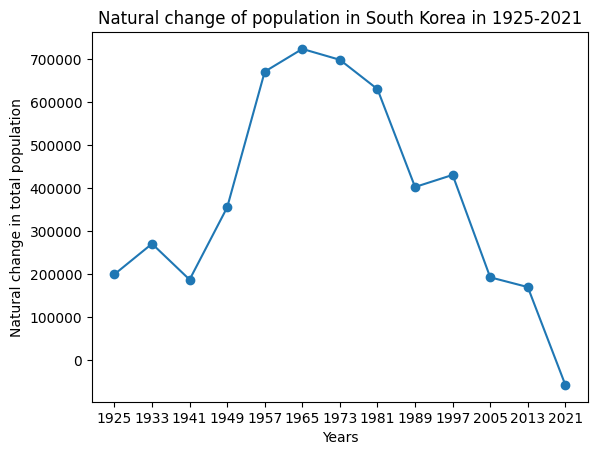

In [122]:
# plot a line graph
plt.plot(selected_years, natural_int, marker = 'o')

plt.xlabel("Years")
plt.ylabel("Natural change in total population")
plt.title("Natural change of population in South Korea in 1925-2021")

**Observation**:

From 1925, the natural change in total population in South Korea underwent drastic changes.

From 1925 to 1965, the population increased significantly, with 1965 having the highest total natural change, meaning the largest increase in national population.

However, ever since then, the population experienced decline; especially from 1981, the population plummeted through 2021, where the natural change in population was negative.

Based on the data, the total population in South Korea is constantly shrinking, and is anticipated to do so in the upcoming years.